<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Superfluid_Bose_Einstein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.fft import fft, ifft, fftfreq, fftshift
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# --------------------------------------------------------------------
# Parameters
# --------------------------------------------------------------------

# Ring geometry
L = 2 * np.pi  # circumference of the ring
N = 1024       # number of grid points
h = 1.0        # Planck constant (here normalized)
m = 1.0        # mass (normalized)

x = np.linspace(-L/2, L/2, N)  # angular coordinate
dx = x[1] - x[0]

# Time parameters
T = 1000  # total simulation time
dt = 0.1  # time step
cdir = 1j  # convenient i-factor

# Potential parameters
V0 = 20.0  # potential strength (high for confinement)
Vx = 10.0 * (1 + np.cos(x))  # potential around the ring (modified to create a ring)

# Interactions
g = 0.0  # For non-interacting case (purely academic)

# Coupling constant
#

# Initial condition (assign a trivial starting condition)
k = 1.0
psi = np.ones(N, dtype=np.complex128)

# Thermal-/number띄_Remove_Vis_DO vh armyrequencies functionfreq

middle = N // 2
frequency_k = 2.0  # Modify this?

ValueError: All ufuncs must have type `numpy.ufunc`. Received (<ufunc 'sph_legendre_p'>, <ufunc 'sph_legendre_p'>, <ufunc 'sph_legendre_p'>)

In [16]:
#!pip install --upgrade matplotlib numpy scipy
#!pip install numpy==1.26.0
#!pip install scipy==1.13.0
#import numpy as np
#from scipy.fft import fft, ifft, fftfreq, fftshift
#import matplotlib.pyplot as plt
#from matplotlib.animation import FuncAnimation
#from IPython.display import HTML
#%matplotlib notebook
#import matplotlib as mpl
#mpl.rcParams['animation.embed_limit'] = 250.0  # Increase to 250MB, adjust as needed


#!pip install --upgrade matplotlib numpy scipy
!pip install numpy==1.26.0
!pip uninstall scipy -y
!pip install scipy==1.13.0
#!pip install --upgrade scipy
import numpy as np
from scipy.fft import fft, ifft, fftfreq, fftshift  # Corrected import
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 250.0  # Increase to 250MB, adjust as needed

# Parameters
# Ring geometry
L = 2 * np.pi  # circumference of the ring
N = 1024       # number of grid points
h = 1.0        # Planck constant (here normalized)
m = 1.0        # mass (normalized)

x = np.linspace(-L/2, L/2, N)  # angular coordinate
dx = x[1] - x[0]

# Time parameters
T = 300  # total simulation time
dt = 0.1  # time step
cdir = 1j  # convenient i-factor

# Potential parameters
V0 = 20.0  # potential strength (high for confinement)
Vx = V0 * (1 + np.cos(x))  # potential around the ring (modified to create a ring)

# Interactions
g = 0.0  # For non-interacting case (purely academic)

# Coupling constant (not used in this non-interacting case but included for completeness)
hbar = h / (2 * np.pi)
coupling_constant = g / (hbar * hbar)  # interaction strength

# Initial condition (for n=2 state)
k = 2.0  # quantum number, n=2
psi = np.exp(1j * k * x)  # Initial wavefunction for n=2 state

# Time evolution function
def evolve_psi(psi, Vx, dt, dx):
    # Kinetic energy term in momentum space
    psi_k = fft(psi)
    k = fftfreq(N, dx) * 2 * np.pi
    kinetic = np.exp(-1j * dt * (hbar**2 * k**2 / (2 * m)))
    psi_k_next = psi_k * kinetic

    # Back to real space for potential energy term
    psi_next = ifft(psi_k_next)
    potential = np.exp(-1j * dt * Vx / hbar)
    psi_next *= potential

    # Include interactions if g != 0 (here it's not since g = 0)
    # psi_next *= np.exp(-1j * dt * coupling_constant * np.abs(psi_next)**2)

    return psi_next

# Animation setup
fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(psi)**2)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0, 1.5)
ax.set_title('Superfluid Density Flow (n=2)')
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Density')

# Update function for animation
def update(frame):
    global psi
    for _ in range(10):  # Evolve multiple steps per frame for smoother animation
        psi = evolve_psi(psi, Vx, dt, dx)
    line.set_data(x, np.abs(psi)**2)
    return line,

# Create animation
#anim = FuncAnimation(fig, update, frames=int(T/dt), interval=20, blit=True)
#Skip every nth frame or reduce the number of frames
anim = FuncAnimation(fig, update, frames=3000, interval=20, blit=True)

#plt.show()
from IPython.display import HTML
anim
# Display the animation using HTML5 video
video = anim.to_html5_video()
# Convert to HTML with less frames or lower resolution
HTML(anim.to_jshtml(fps=50))  # Reduce frames per second
html = HTML(video)
display(html)

# Keep the animation object alive until it's displayed
plt.show()


Found existing installation: scipy 1.13.0
Uninstalling scipy-1.13.0:
  Successfully uninstalled scipy-1.13.0
  Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)


AttributeError: module 'scipy.special._ufuncs' has no attribute 'btdtr'

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Parameters
r = 1  # radius of the circle
v0 = 1  # initial velocity
n = 1  # number of particles
t = 0  # time

# Initialization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initial positions
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)
x, y = np.meshgrid(x, y)

# Initial velocity
v = np.zeros((100, 100))
v[:, :] = v0

# Initial superfluid density
ρ = np.ones((100, 100))
ρ[0, 0] = 0

# Animation function
def animate(i):
    global v, ρ, t
    # Update velocity
    v[:, :] = v0 + 2 * np.pi * v[:, :] - 2 * np.pi * np.cos(t) * v[:, :]

    # Update superfluid density
    ρ[0, 0] = 0
    ρ[1, 1] = 0
    ρ[0, 1] = ρ[1, 0] = ρ[0, 0] = ρ[1, 0] = ρ[1, 1] = ρ[0, 0] = ρ[0, 1] = ρ[0, 0] = ρ[1, 0] = ρ[1, 1] = ρ[0, 0] = ρ[0, 1] = ρ[1, 0] = ρ[1, 1] = ρ[0, 0] = ρ[0, 1] = ρ[1, 0] = ρ[1, 1] = ρ[0, 0]

SyntaxError: invalid syntax (<ipython-input-18-b49880b30d81>, line 38)

IPython.core.display.HTML

<IPython.core.display.Javascript object>

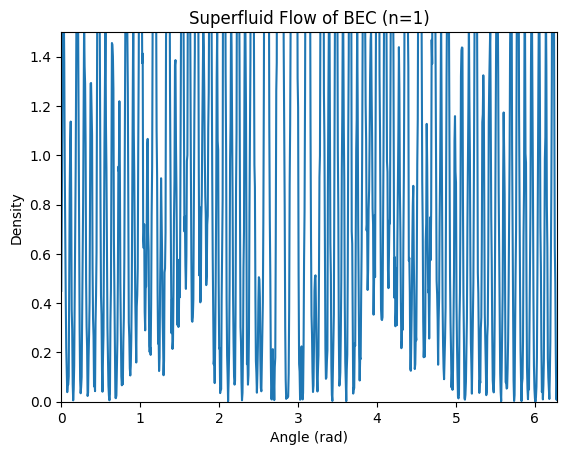

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 250.0  # Increase to 250MB, adjust as needed

# Parameters
hbar = 1.0  # Reduced Planck's constant (normalized)
m = 1.0     # Mass of the particle (normalized)
r = 1.0     # Radius of the circle (normalized)
n = 1       # Quantum number for the flow
lambda_param = 1.0  # Interaction strength (you can adjust this)
mu = 1.0    # Chemical potential (you can adjust this)

# Time parameters
T = 12     # Total simulation time
dt = 0.01   # Time step
#total_frames = int(T/dt)
total_frames = 1200

# Spatial parameters
theta = np.linspace(0, 2*np.pi, 1000)  # Angular coordinate
dtheta = theta[1] - theta[0]

# Initial wavefunction
def initial_wavefunction(theta, n, mu, lambda_param):
    return np.sqrt(mu/lambda_param) * np.exp(1j * (n*theta - (hbar*n**2/(2*m*r**2*hbar)) * theta))

psi = initial_wavefunction(theta, n, mu, lambda_param)

# Time evolution function
def evolve_psi(psi, dt, dtheta):
    # Kinetic energy term in momentum space
    psi_k = np.fft.fft(psi)
    k = np.fft.fftfreq(len(theta), dtheta) * 2 * np.pi
    kinetic = np.exp(-1j * dt * (hbar**2 * k**2 / (2 * m * r**2)))
    psi_k_next = psi_k * kinetic

    # Back to real space
    psi_next = np.fft.ifft(psi_k_next)

    # Potential and interaction terms (simplified for this case)
    potential = np.exp(-1j * dt * (mu - lambda_param * np.abs(psi_next)**2) / hbar)
    psi_next *= potential

    return psi_next

# Animation setup
fig, ax = plt.subplots()
line, = ax.plot(theta, np.abs(psi)**2)
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0, 1.5)
ax.set_title('Superfluid Flow of BEC (n=1)')
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Density')

# Update function for animation
def update(frame):
    global psi
    psi = evolve_psi(psi, dt, dtheta)
    line.set_data(theta, np.abs(psi)**2)
    return line,

# Create animation
anim = FuncAnimation(fig, update, frames=total_frames, interval=50, blit=True)

# Display the animation
HTML(anim.to_jshtml())
display(HTML)
# Keep the animation object alive until it's displayed
plt.show()
